In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [556]:
# TASK 1

In [557]:
# here we import the files
fA = pd.read_csv('futuresA.csv')
fA.columns=['Date','futuresA_Last']
fB = pd.read_csv('futuresB.csv')
fB.columns=['Date','futuresB_close']

In [558]:
# define variables
L=200 # Long position 
C=25 # Cost variable
S=-200 # Short position
N=5 # Rolling number of days

In [559]:
# arrange by ascending dates
fA=fA.iloc[::-1]
fA['Date'] = pd.to_datetime(fA['Date'], utc=True, format='%d/%m/%Y').dt.date
fA.head()

,Date,futuresA_Last
10363,1977-08-22,102.375
10362,1977-08-23,102.781
10361,1977-08-24,102.656
10360,1977-08-25,103.094
10359,1977-08-26,103.062


In [560]:
fB=fB.iloc[::-1]
fB['Date'] = pd.to_datetime(fB['Date'], utc=True, format='%d/%m/%Y').dt.date
fB

,Date,futuresB_close
7656,1988-05-20,96.953125
7655,1988-05-23,96.796875
7654,1988-05-24,96.812500
7653,1988-05-25,96.890625
7652,1988-05-26,96.765625
...,...,...
4,2018-10-22,112.085938
3,2018-10-23,112.265625
2,2018-10-24,112.484375
1,2018-10-25,112.421875


In [561]:
#join on dates
df = fA.join(fB.set_index('Date'), on='Date').set_index('Date')
df

,futuresA_Last,futuresB_close
Date,,
1977-08-22,102.37500,NaN
1977-08-23,102.78100,NaN
1977-08-24,102.65600,NaN
1977-08-25,103.09400,NaN
1977-08-26,103.06200,NaN
...,...,...
2018-10-22,137.68750,112.085938
2018-10-23,138.18750,112.265625
2018-10-24,139.06250,112.484375


In [562]:
# rolling standard deviation for N days 
df['std_rolling_A']=df['futuresA_Last'].rolling(N).std()
df['std_rolling_B']=df['futuresB_close'].rolling(N).std()


df['A_diff'] = df['futuresA_Last'].diff()
df['B_diff'] = df['futuresB_close'].diff()
df

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff
Date,,,,,,
1977-08-22,102.37500,NaN,NaN,NaN,NaN,NaN
1977-08-23,102.78100,NaN,NaN,NaN,0.40600,NaN
1977-08-24,102.65600,NaN,NaN,NaN,-0.12500,NaN
1977-08-25,103.09400,NaN,NaN,NaN,0.43800,NaN
1977-08-26,103.06200,NaN,0.298579,NaN,-0.03200,NaN
...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750


In [563]:
#df['diff']#


In [564]:
# drop nan values
df_new=df.dropna()
df_new

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff
Date,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375
...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750


In [565]:
# our X value
std_dev_cutoffA = 0.5
# our Y value 
std_dev_cutoffB = 0.5


In [566]:
#pseudo code
# if price of day 4 < day 3 - cutoff*std_rolling :  
#      df['position_A']== 'Long'



conditions = [
    (-df_new['B_diff'] > df_new['std_rolling_B']*std_dev_cutoffB),
    (df_new['B_diff']>  df_new['std_rolling_B']*std_dev_cutoffB)]
positions=['Long','Short']

In [567]:
# Long or short position
df_new['A_position']=np.select(conditions, positions,default='Close')

<ipython-input-567-7fc2b52c5a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['A_position']=np.select(conditions, positions,default='Close')


In [568]:
#size of position
conditionsSize = [
    (df_new['A_position'] == 'Long'),
    (df_new['A_position']== 'Short')]

sizes=[L,S]
df_new['Size']=np.select(conditionsSize, sizes,default=0)

<ipython-input-568-7135556d8a08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Size']=np.select(conditionsSize, sizes,default=0)


In [569]:
df_new

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff,A_position,Size
Date,,,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000,Long,200
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250,Long,200
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750,Short,-200
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125,Short,-200
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375,Close,0
...,...,...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438,Close,0
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688,Short,-200
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750,Short,-200


In [570]:
df_new['change_in_size_on_position']=0
for i in range(len(df_new.index)):
    if df_new.A_position[i-1]!=df_new.A_position[i]:
        df_new.change_in_size_on_position[i] = df_new.Size[i]
df_new

<ipython-input-570-91c34f757710>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['change_in_size_on_position']=0
<ipython-input-570-91c34f757710>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.change_in_size_on_position[i] = df_new.Size[i]
/Users/pt621/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff,A_position,Size,change_in_size_on_position
Date,,,,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000,Long,200,200
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250,Long,200,0
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750,Short,-200,-200
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125,Short,-200,0
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375,Close,0,0
...,...,...,...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438,Close,0,0
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688,Short,-200,-200
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750,Short,-200,0


In [571]:
#cost for position
df_new['Cost']=abs(df_new['change_in_size_on_position'])*C

<ipython-input-571-d7ab22b9b29f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cost']=abs(df_new['change_in_size_on_position'])*C


In [572]:
df_new['PnL_val'] = 0.0
df_new['PnL']= None


<ipython-input-572-9362cabee306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PnL_val'] = 0.0
<ipython-input-572-9362cabee306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PnL']= None


In [573]:
#amount of profit or loss
for i in range(len(df_new.index)):
    df_new.PnL_val[i]=-df_new.change_in_size_on_position[i]*(df_new.futuresA_Last[i])


<ipython-input-573-45406a01a0c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.PnL_val[i]=-df_new.change_in_size_on_position[i]*(df_new.futuresA_Last[i])
/Users/pt621/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [574]:
#label profit ot loss
df_new.loc[df_new['PnL_val']< 0, 'PnL']='Loss'
df_new.loc[df_new['PnL_val']> 0, 'PnL']='Profit'

/Users/pt621/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/pt621/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [575]:

df_new['Cumulative_PL']=df_new.PnL_val.cumsum()

<ipython-input-575-31cbe8c894b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cumulative_PL']=df_new.PnL_val.cumsum()


In [576]:
df_new

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff,A_position,Size,change_in_size_on_position,Cost,PnL_val,PnL,Cumulative_PL
Date,,,,,,,,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000,Long,200,200,5000,-17131.24,Loss,-17131.240
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250,Long,200,0,0,0.00,None,-17131.240
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750,Short,-200,-200,5000,17162.50,Profit,31.260
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125,Short,-200,0,0,0.00,None,31.260
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375,Close,0,0,0,0.00,None,31.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438,Close,0,0,0,0.00,None,2366964.275
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688,Short,-200,-200,5000,27637.50,Profit,2394601.775
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750,Short,-200,0,0,0.00,None,2394601.775


Text(0, 0.5, 'Cumulative profit and loss')

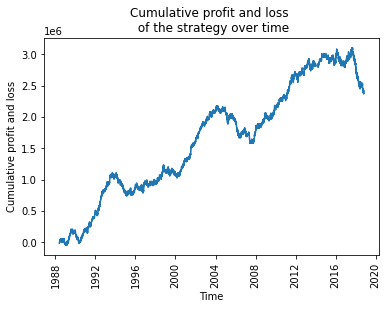

In [577]:
# Plot of cummulate profit and loss
plt.plot(df_new.index,df_new.Cumulative_PL)
plt.title('Cumulative profit and loss \n of the strategy over time')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Cumulative profit and loss')

In [578]:
df_new['rolling_max_profit']=0.0
for i in range(len(df_new.index)):
    df_new.rolling_max_profit[i]=df_new.PnL_val.rolling(i).max()[i]

<ipython-input-578-e1a3ab08e374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rolling_max_profit']=0.0
<ipython-input-578-e1a3ab08e374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rolling_max_profit[i]=df_new.PnL_val.rolling(i).max()[i]
/Users/pt621/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [579]:
df_new

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff,A_position,Size,change_in_size_on_position,Cost,PnL_val,PnL,Cumulative_PL,rolling_max_profit
Date,,,,,,,,,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000,Long,200,200,5000,-17131.24,Loss,-17131.240,NaN
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250,Long,200,0,0,0.00,None,-17131.240,0.0
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750,Short,-200,-200,5000,17162.50,Profit,31.260,17162.5
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125,Short,-200,0,0,0.00,None,31.260,17162.5
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375,Close,0,0,0,0.00,None,31.260,17162.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438,Close,0,0,0,0.00,None,2366964.275,35175.0
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688,Short,-200,-200,5000,27637.50,Profit,2394601.775,35175.0
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750,Short,-200,0,0,0.00,None,2394601.775,35175.0


In [582]:
# drawdown = absolute loss/ profit at gven time
df_new['drawdown']=None
for i in range(len(df_new.index)):
    if df_new.PnL[i] == 'Loss':
        df_new.drawdown[i]=df_new.PnL_val[i]/df_new.rolling_max_profit[i]

df_new

<ipython-input-582-21993d2eda21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['drawdown']=None
<ipython-input-582-21993d2eda21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drawdown[i]=df_new.PnL_val[i]/df_new.rolling_max_profit[i]
/Users/pt621/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,futuresA_Last,futuresB_close,std_rolling_A,std_rolling_B,A_diff,B_diff,A_position,Size,change_in_size_on_position,Cost,PnL_val,PnL,Cumulative_PL,rolling_max_profit,drawdown
Date,,,,,,,,,,,,,,,
1988-05-26,85.65620,96.765625,0.175933,0.076547,-0.09380,-0.125000,Long,200,200,5000,-17131.24,Loss,-17131.240,NaN,NaN
1988-05-27,85.50000,96.609375,0.170292,0.103409,-0.15620,-0.156250,Long,200,0,0,0.00,None,-17131.240,0.0,None
1988-05-31,85.81250,96.703125,0.150828,0.106891,0.31250,0.093750,Short,-200,-200,5000,17162.50,Profit,31.260,17162.5,None
1988-06-01,87.53120,97.281250,0.836352,0.261830,1.71870,0.578125,Short,-200,0,0,0.00,None,31.260,17162.5,None
1988-06-02,87.25000,97.171875,0.961509,0.300146,-0.28120,-0.109375,Close,0,0,0,0.00,None,31.260,17162.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-22,137.68750,112.085938,0.297614,0.070659,-0.12500,0.023438,Close,0,0,0,0.00,None,2366964.275,35175.0,None
2018-10-23,138.18750,112.265625,0.228574,0.083889,0.50000,0.179688,Short,-200,-200,5000,27637.50,Profit,2394601.775,35175.0,None
2018-10-24,139.06250,112.484375,0.542167,0.169821,0.87500,0.218750,Short,-200,0,0,0.00,None,2394601.775,35175.0,None


Text(0, 0.5, 'Drawdown')

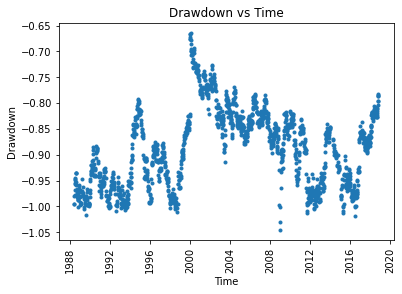

In [597]:
plt.plot(df_new.index,df_new.drawdown,'.--')
plt.title('Drawdown vs Time')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Drawdown')

In [586]:
max_date=df_new.index.max()
min_date=df_new.index.min()
days_held=(max_date-min_date).days
days_held

11110

In [587]:
max_val=df_new.futuresA_Last.loc[df_new.index==max_date].item()
min_val=df_new.futuresA_Last.loc[df_new.index==min_date].item()
annualised_return=(max_val-min_val)**(365/days_held)-1
print('The annualised return is', annualised_return)
return_of_portfolio=1
risk_free_rate=0
std_portfolio=df_new.futuresA_Last.std()
sharpe_ratio=(return_of_portfolio-risk_free_rate)/std_portfolio
print('The sharpe ratio is', sharpe_ratio)
print('The max drawdown is', df_new.drawdown.max())

The annualised return is 0.13991769470644888
The sharpe ratio is 0.05172339784126541
The max drawdown is -0.6639585313688213


In [522]:
# TASK 2

How to ensure a 0% probability of losing and optimising risk adjusted returns of the portfolio:

1. My strategy involves buying call and put options once the position reaches a certain level either way. For example, if we have exposure of around 5 million USD (calculated by current price x size), I would buy options depending on the position, so if we are in a short position, I would buy call options, and put options if we are in a long position. However if we have less than $5 million of exposure, then I would refrain from buying options. This is to ensure that we can sell our stock without losing too much money.

2. If p1 and p2 are small, then I would be more likely to buy options and reduce the threshold of buying options to about 2% exposure of our total AUM. This is because if in the scenario we experience low levels of activity, it is easy to sell/buy stock to reduce loss.
	However if p1 and p2 are large, therefore nearing 0.5, I would increase the threshold as there will be more activity and therefore I need to worry less whether we will close our position without too much loss.

 	This all depends on S, since if S is large, and each activity (i.e. a market taker buys from or sells to us) accounts for a large proportion of our AUM, for example $1 million, then I would reduce the threshold at which I start hedging since I am more likely to make a loss in the event I have a big long or short position.

If C is close to M, I am more likely to lower the threshold of AUM that I start to hedge since it is cheaper to do so, whereas if C is much greater than M, I would deter on hedging, depending on the other factors.

More information that I would like to know is the price of the asset that I am providing a market for and how tight my spread is, for example if I am an official market maker I will have to keep much tighter spreads, compared to others, but will receive larger reward for the liquidity I provide.

3. I would not wish to trade variables where p1 >> p2 (or vice versa) or C >> M.
4. If the futures contracts are more volatile, then I can provide a wider spread, this is because the chances of the offers being accepted will therefore be greater due to the uncertainty and hence as a market maker I will receive more fees and so be more profitable. 
5. If p1 and p2 changed with time then the strategy will have to change depending on the variables. So if we instead think of strategies for a selection of p1 and p2 strategies and use those to hedge according to what the value is at when. However, in the case that p1 and p2 could like turn into bad variables as mentioned in part 3, it is risky to be a market maker and therefore I would not enter the market.